<h1 style="text-align: center;">Sentiment Analysis on Amazon Reviews 📊</h1>

## Objective

The rapid growth of e-commerce, accelerated significantly during and after the COVID-19 pandemic, has reshaped consumer purchasing behaviors for both essential and non-essential goods. This shift has resulted in an overwhelming increase in online customer reviews, offering businesses a wealth of insights into customer satisfaction, product performance, and potential areas for improvement. However, the sheer volume of these reviews makes manual analysis infeasible for organizations striving to understand and act on customer sentiments effectively.
Sentiment analysis has emerged as an essential solution, leveraging Natural Language Processing (NLP) and machine learning techniques to automatically identify and classify opinions expressed in text. This research explores the application of these techniques to analyze e-commerce reviews, aiming to uncover actionable insights at scale. By automating sentiment analysis, businesses can enhance customer experiences, personalize offerings, and make informed, data-driven decisions that align with evolving customer preferences. This study not only addresses the challenges of large-scale sentiment analysis but also highlights its transformative potential for improving business strategies in the dynamic e-commerce landscape

## Data Description

The dataset used in this project is titled **Amazon Product Reviews** and was sourced from both Kaggle and the University of San Diego’s website. It is a publicly available dataset under the **CC0 1.0 Universal license**, which means it is free to use, share, and adapt without legal restrictions. The dataset can be accessed through [this Kaggle link](https://www.kaggle.com/datasets/arhamrumi/amazon-product-reviews/data).

### Dataset Structure

The dataset comprises the following fields:

1. **Id**: A unique identifier for each review entry.
2. **ProductId**: A unique identifier for the product being reviewed.
3. **UserId**: A unique identifier for the user who submitted the review.
4. **ProfileName**: The name of the user who submitted the review.
5. **HelpfulnessNumerator**: The number of users who found the review helpful.
6. **HelpfulnessDenominator**: The total number of users who rated the helpfulness of the review.
7. **Score**: The rating provided by the user, typically on a scale of 1 to 5.
8. **Time**: A timestamp representing when the review was submitted.
9. **Summary**: A short title or summary of the review.
10. **Text**: The full review text.

### Data Preprocessing and Ethical Considerations:

For this project, the **UserId** and **ProfileName** columns will be dropped from the dataset. This decision is made to ensure that no personal identifiers are used, thus maintaining ethical standards and adhering to data privacy principles. Removing these fields ensures that the dataset is ethically cleared for analysis while retaining all necessary information for sentiment analysis

## Key Research Questions to be Addressed

- **How accurately can various machine learning models classify sentiment in e-commerce reviews?**
- **How do different text preprocessing techniques impact the performance of sentiment classification models?**
- **How do various feature extraction methods affect the accuracy of sentiment classification?**
- **How do different machine learning models compare in terms of performance when classifying sentiment in e-commerce reviews?**

## Methodology

### Imports & Downloads

To run this notebook you will need the following installed:
- `pip install pandas`
- `pip install numpy`
- `pip install seaborn`
- `pip install matplotlib`
- `pip install scikit-learn`
- `pip install nltk`
- `pip install textblob`
- `pip install wordcloud`
- `pip install beautifulsoup4`
- `pip install emoji`
- `pip install contractions`

#### 1. Libraries & Packages

In [1]:
# For local installation please uncomment the following and run this code block

# %pip install pandas
# %pip install numpy
# %pip install seaborn
# %pip install matplotlib
# %pip install scikit-learn
# %pip install nltk
# %pip install textblob
# %pip install wordcloud
# %pip install beautifulsoup4
# %pip install emoji
# %pip install contractions

#### 2. Import Packages

In [2]:
# ===================================================
# DATA MANIPULATION & ANALYSIS
# ===================================================
import pandas as pd
import numpy as np

# ===================================================
# DATA VISUALIZATION
# ===================================================
import seaborn as sns
import matplotlib.pyplot as plt

# ===================================================
# MACHINE LEARNING & MODEL SELECTION
# ===================================================
import sklearn as sk
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# ===================================================
# MACHINE LEARNING MODELS
# ===================================================
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

# ===================================================
# FEATURE EXTRACTION & TEXT VECTORIZATION
# ===================================================
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# ===================================================
# TEXT PREPROCESSING
# ===================================================
import re
import string
import unicodedata
import contractions
import collections
import emoji
from bs4 import BeautifulSoup  # For parsing HTML
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer

# ===================================================
# SENTIMENT ANALYSIS
# ===================================================
from textblob import TextBlob

# ===================================================
# WORD CLOUDS
# ===================================================
from wordcloud import WordCloud

# ===================================================
# UTILITIES & MISCELLANEOUS
# ===================================================
import json  # To save results
from tqdm import tqdm  # Progress bar

#### 3. Install NLTK Tools

In [3]:
# Downloading NLTK resources
# Please uncomment the following line if you haven't downloaded the NLTK resources:

# nltk.download('all')

### Step 1: Load Data

In [4]:
# Balanced data is data where all reviews (1 star to 5 star) are taken in equal proportion to avoid overfitting or underfitting
# 25000 Records of each star rating is taken
df_balancedData = pd.read_csv('Datasets/balanced_reviews.csv')

### Step 2: Exploratory Data Analysis (EDA)

In [5]:
df_balancedData.shape

(125000, 10)

In [6]:
df_balancedData.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,length
0,B008COIXOG,AY12DBB0U420B,Gary Peterson,1,1,5,1342310400,Nice Fresh Coconut Taste. Loaded With Potassium.,I just recently visited my nearby Fresh and Ea...,357
1,B004VLVG0C,A1KE5DCWHTAUUX,Gary Anderson,1,1,5,1336867200,Semolina flour for making pasta,This works great I followed the recipe on the...,296
2,B000FL0A9K,AJKN1OQ368JGH,Lynn Benson,0,0,2,1181692800,Too Sweet,Personal preference too sweet Tastes like Gen...,142
3,B0015MY6PC,A2CFYUTWZ3N3FJ,A. Pickett,0,0,5,1244160000,My Daughter Loves These,My daughter loves these snacks She doesnt care...,539
4,B000LTIDR2,A1MG6S9RPWX7C7,Rebeliium,0,0,3,1346976000,Too Much and Too Sweet,I would not recommend buying this product beca...,1331


In [7]:
df_balancedData.tail()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,length
124995,B000JOE224,A28EQ06V6ZOMV0,"Nanette Erickson ""An avid reader from Florida""",0,0,5,1272326400,Terrific idea.,I have a cat that can sense a pill in anything...,190
124996,B000WJ6C2O,AC2GDNWF8REFU,mammy,0,0,5,1328918400,Bran Flakes,I was looking for an affordable product to use...,256
124997,B004N8LMFM,A1O80FSHN7HR8F,Derp,3,22,1,1310169600,tasted like plastic. Instructions not readible.,tasted like plastic The texture is so strange ...,292
124998,B000GW257S,A1NL8RB3BHVFKR,Katrina,0,0,1,1323993600,YUK,This stuff taste terrible Just like an artifi...,141
124999,B002QWP89S,A1HZIWB1RGW7RM,Danny Knowles,1,1,5,1319673600,Greenies,These are the best things since sliced bread ...,300


In [8]:
df_balancedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               125000 non-null  object
 1   UserId                  125000 non-null  object
 2   ProfileName             124998 non-null  object
 3   HelpfulnessNumerator    125000 non-null  int64 
 4   HelpfulnessDenominator  125000 non-null  int64 
 5   Score                   125000 non-null  int64 
 6   Time                    125000 non-null  int64 
 7   Summary                 124978 non-null  object
 8   Text                    125000 non-null  object
 9   length                  125000 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 9.5+ MB


In [9]:
df_balancedData.describe()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,length
count,125000.000000,125000.000000,125000.000000,1.250000e+05,125000.000000
mean,1.852448,2.773656,3.000000,1.299249e+09,456.388040
std,7.729888,8.831183,1.414219,4.597147e+07,455.731686
min,0.000000,0.000000,1.000000,9.617184e+08,30.000000
25%,0.000000,0.000000,2.000000,1.278547e+09,189.000000
50%,0.000000,1.000000,3.000000,1.313626e+09,324.000000
75%,2.000000,3.000000,4.000000,1.333411e+09,561.000000
max,844.000000,923.000000,5.000000,1.351210e+09,20560.000000


In [10]:
df_balancedData.columns

Index(['ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text', 'length'],
      dtype='object')

In [11]:
df_balancedData['Text']

0         I just recently visited my nearby Fresh and Ea...
1         This works great  I followed the recipe on the...
2         Personal preference too sweet  Tastes like Gen...
3         My daughter loves these snacks She doesnt care...
4         I would not recommend buying this product beca...
                                ...                        
124995    I have a cat that can sense a pill in anything...
124996    I was looking for an affordable product to use...
124997    tasted like plastic The texture is so strange ...
124998    This stuff taste terrible  Just like an artifi...
124999    These are the best things since sliced bread  ...
Name: Text, Length: 125000, dtype: object

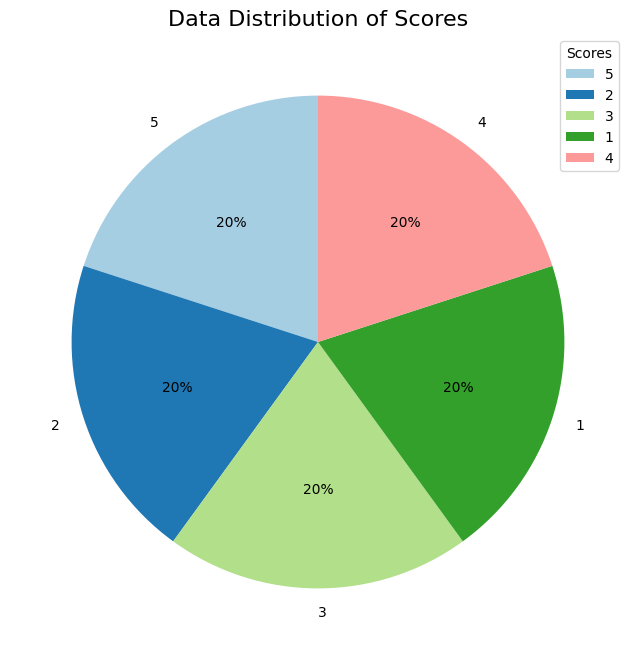

In [12]:
# Create a pie chart
plt.figure(figsize=(10, 8))
df_balancedData['Score'].value_counts().plot(
    kind='pie', 
    autopct='%.0f%%', 
    startangle=90,  # Rotate the pie chart for better orientation
    colors=plt.cm.Paired.colors  # Add distinct colors for each segment
)

# Add title and legend
plt.title('Data Distribution of Scores', fontsize=16)
plt.ylabel('')  # Remove the default y-axis label for better aesthetics
plt.legend(title='Scores', loc='upper right')

# Show the plot
plt.show()

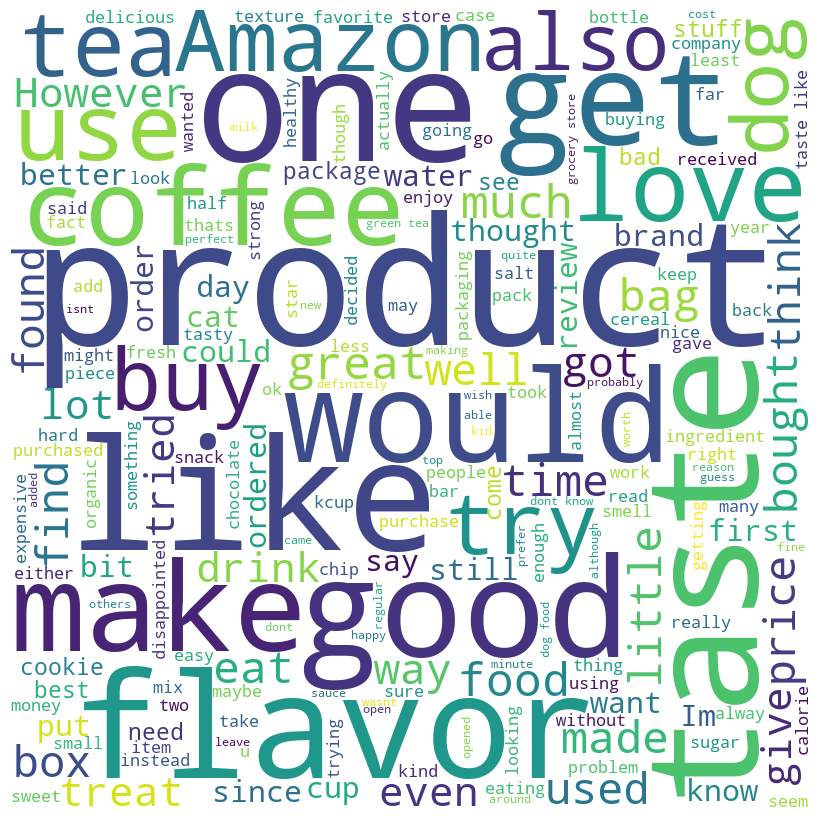

In [13]:
# Define stopwords
stop_words = set(stopwords.words('english'))

# Combine all text from the 'Review' column into a single string
all_reviews = " ".join(df_balancedData["Text"])

# Generate the Word Cloud
wordcloud = WordCloud(
    stopwords=stop_words, 
    width=800, 
    height=800, 
    background_color='white', 
    min_font_size=10
).generate(all_reviews)

# Plot the Word Cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

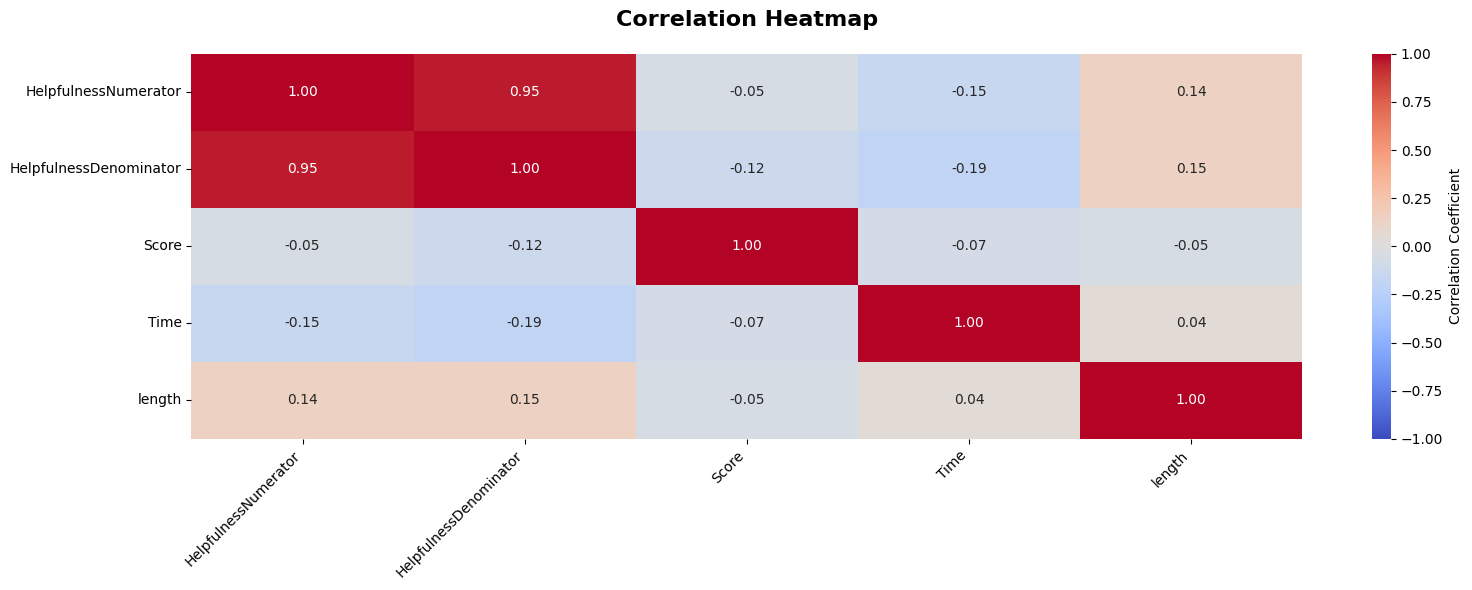

In [14]:
# Select numeric columns only
numeric_data = df_balancedData.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(16, 6))

# Generate the heatmap
heatmap = sns.heatmap(
    correlation_matrix, 
    vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'}
)

# Customize the title
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 16, 'fontweight': 'bold'}, pad=20)

# Rotate x and y axis labels for clarity
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Tighten the layout for better spacing
plt.tight_layout()

# Display the heatmap
plt.show()

### Step 3: Data Cleaning & Preprocessing

#### Drop Unnecesary Columns

In [15]:
# Select only relevant columns
df_balancedData = df_balancedData[['ProductId', 'Score', 'Text']]
# Display the updated DataFrame
df_balancedData.head()

,ProductId,Score,Text
0,B008COIXOG,5,I just recently visited my nearby Fresh and Ea...
1,B004VLVG0C,5,This works great I followed the recipe on the...
2,B000FL0A9K,2,Personal preference too sweet Tastes like Gen...
3,B0015MY6PC,5,My daughter loves these snacks She doesnt care...
4,B000LTIDR2,3,I would not recommend buying this product beca...


#### Map Sentiment Classes from Score (3 Classes)

In [16]:
#########################################
#   Map 5-Star Ratings to 3 Classes
#########################################
def map_to_3_classes(score):
    if score in [1, 2]:
        return 'negative'
    elif score == 3:
        return 'neutral'
    else:  # 4 or 5
        return 'positive'

df_balancedData['Sentiment'] = df_balancedData['Score'].apply(map_to_3_classes)

In [17]:
df_balancedData.head()

,ProductId,Score,Text,Sentiment
0,B008COIXOG,5,I just recently visited my nearby Fresh and Ea...,positive
1,B004VLVG0C,5,This works great I followed the recipe on the...,positive
2,B000FL0A9K,2,Personal preference too sweet Tastes like Gen...,negative
3,B0015MY6PC,5,My daughter loves these snacks She doesnt care...,positive
4,B000LTIDR2,3,I would not recommend buying this product beca...,neutral


#### Remove Emojis

In [ ]:

class CleanEmojis(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Apply emoji removal to the 'Text' column of the DataFrame
        tqdm.pandas(desc="Removing emojis")  # Add progress bar for this step
        X['Text'] = X['Text'].progress_apply(lambda review: emoji.demojize(review))
        return X

# Apply the transformer to the DataFrame
cleaner = CleanEmojis()
df_balancedData_cleaned = cleaner.transform(df_balancedData)

# Display the updated DataFrame
df_balancedData_cleaned.head()

#### Method for Removing Special Characters, URLS, HTML etc. and convert to lowercase

In [ ]:
# Define the StringProcessing class
class StringProcessing(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        filtered_tweets = []
        for review in X:
            # Converting to lowercase
            review = review.lower()
            # Substituting ampersand signs to 'and'
            review = re.sub(r"&amp", "and", review)
            review = re.sub(r"&", "and", review)
            # Removing @ mentions and hashtags
            review = re.sub(r"[@#][^\s]+", " ", review)
            # Removing URLs
            review = re.sub(r"(http\S+)|(www\S+)", "", review)
            # Removing HTML tags
            review = re.sub(r"<[^<]+?>", " ", review)
            # Cleaning emojis
            review = re.sub(r":", " ", review)
            review = review.replace("_", " ")
            # Removing special characters
            review = re.sub(r"[^a-z0-9'’ ]", " ", review)
            # Removing extra whitespace
            review = re.sub(r"\s+", " ", review)
            filtered_tweets.append(review)
        return filtered_tweets

# Create an instance of the StringProcessing transformer
string_processor = StringProcessing()

# Apply the transformation to the 'Text' column and store the result in a new 'Text' column
df_balancedData.loc[:, 'Text'] = string_processor.transform(df_balancedData['Text'])

# Display the updated DataFrame with the new 'Review' column
df_balancedData.head()

#### Preprocessed Text into New column 'Review'

In [ ]:
# Text column is not needed, so its replaced with the preprocesses 'Review' column
df_balancedData = df_balancedData[['ProductId', 'Score', 'Text']]
df_balancedData.head()

#### Method to substitute contractions

In [ ]:
def collect_short_contractions(short_contractions):
    short_contractions_dict = {}
    # Sort the contractions alphabetically
    for key, value in sorted(short_contractions.items()):
        # Remove apostrophes from the contraction keys
        new_key = key.replace("'", "")
        short_contractions_dict[new_key] = value
    return short_contractions_dict

# (Maarten et al., 2013)
short_contractions = {
    "i'd": "i would",
    "we'd": "we would",
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "doesn’t": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "haven’t": "have not",
    "he'd": "he would",
    "he'll": "he will",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'll": "I will",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'll": "it will",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "oughtn't": "ought not",
    "shan't": "shall not",
    "she'd": "she would",
    "she'll": "she will",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "that'd": "that would",
    "that's": "that is",
    "there'd": "there had",
    "there's": "there is",
    "they'd": "they would",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'll": "we will",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who's": "who is",
    "who've": "who have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "y'all": "you all",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have"
}

short_contractions_dict = collect_short_contractions(short_contractions)
short_contractions_dict

In [ ]:
class ExpandContractions(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        expanded_reviews = []
        # Wrap X in tqdm for a progress bar
        for review in tqdm(X, desc="Expanding Contractions"):
            expanded_reviews.append(contractions.fix(review))
        return expanded_reviews

#### Method to handle Slang words

In [ ]:
def collect_slangs(slangs):
    slang_dict = {}
    for line in slangs.strip().split('\n'):
        key, value = line.lower().strip().split(': ', 1)  # Added limit to split on first ':'
        slang_dict[key] = value

    # Sort the dictionary by keys alphabetically
    return dict(sorted(slang_dict.items()))

# (SlickText, 2023)
slangs = '''
  ROFL: Rolling on the floor laughing
  STFU: Shut up
  ICYMI: In case you missed it
  TL;DR: Too long, didn’t read
  TMI: Too much information
  AFAIK: As far as I know
  LMK: Let me know
  NVM: Nevermind
  FTW: For the win
  BYOB: Bring your own beer
  BOGO: Buy one get one
  JK: Just kidding
  TBH: To be honest
  TBF: To be frank
  RN: Right now
  BRB: Be right back
  BTW: By the way
  GG: Good game
  IRL: In real life
  LOL: Laugh out loud
  SMH: Shaking my head
  NGL: Not gonna lie
  IKR: I know right
  TTYL: Talk to you later
  IMO: In my opinion
  WYD: What are you doing?
  IDK: I don’t know
  IDC: I don’t care
  IDGAF: I don’t care
  TBA: To be announced
  TBD: To be decided
  AFK: Away from keyboard
  IYKYK: If you know you know
  B4: Before
  FOMO: Fear of missing out
  GTG: Got to go
  G2G: Got to go
  H8: Hate
  LMAO: Laughing my ass off
  IYKWIM: If you know what I mean
  MYOB: Mind your own business
  POV: Point of view
  HBD: Happy birthday
  WYSIWYG: What you see is what you get
  FWIF: For what it’s worth
  TW: Trigger warning
  EOD: End of day
  FAQ: Frequently asked question
  AKA: Also known as
  ASAP: As soon as possible
  DIY: Do it yourself
  NP: No problem
  U: you
  R: are
  PLS: please
  WYD: what are you doing
  N/A: Not applicable
  K: Okay
  WUT: what
  FYI: For your information
  NSFW: Not safe for work
  WFH: Work from home
  OMW: On my way
  DM: Direct message
  FB: Facebook
  IG: Instagram
  YT: YouTube
  QOTD: Quote of the day
  OOTD: Outfit of the day
  AMA: Ask me anything
  HMU: Hit me up
  ILY: I love you
  BF: Boyfriend
  GF: Girlfriend
  BAE: Before anyone else
  LYSM: Love you so much
  PDA: Public display of affection
  XOXO: Hugs and kisses
  LOML: Love of my life
  THX: thanks
  V: very
  OMG: Oh My God
'''

slang_dict = collect_slangs(slangs)
slang_dict

In [ ]:
import re
from sklearn.base import BaseEstimator, TransformerMixin

class ReplaceSlangs(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        filtered_reviews = []
        for review in tqdm(X, desc="Replacing Slangs"):
            # Replace slang
            for key, value in slang_dict.items():
                review = re.sub(r'\b{}\b'.format(re.escape(key)), value, review, flags=re.IGNORECASE)
            
            # Replace short contractions
            for key, value in short_contractions_dict.items():
                review = re.sub(r'\b{}\b'.format(re.escape(key)), value, review, flags=re.IGNORECASE)
            
            filtered_reviews.append(review)
        return filtered_reviews

#### Method for Tokenization

In [ ]:
class Tokenize(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        filtered_tweets = []
        for tweet in tqdm(X, desc="Tokenizing"):
            filtered_tweets.append(nltk.word_tokenize(tweet))
        return filtered_tweets

#### Method to remove stopwords
**There are certain words in the built-in NLTK stop word list that if we removed, would change the sentiment of the text. Therefore, we decided to modify the original list by removing certain words like "no", "against", "above" etc.**

In [ ]:
class RemoveStopwords(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        sentiment_stopwords = [
            'against', 'above', 'below', 'up', 'down', 'over', 'under', 'no', 'nor', 'not',
            "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
            'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
            'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't",
            'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't",
            'won', "won't", 'wouldn', "wouldn't"
        ]
        
        stop_words = set(stopwords.words('english'))
        for word in sentiment_stopwords:
            stop_words.remove(word)
        
        processed_reviews = []
        for review in tqdm(X, desc="Removing Stopwords"):
            tokens_without_stopwords = [word for word in review if word not in stop_words]
            processed_reviews.append(tokens_without_stopwords)
        
        return processed_reviews

#### Method to apply lemmatization

In [ ]:
class Lemmatize(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        lemmatizer = WordNetLemmatizer()
        lemmatized_reviews = []

        def get_wordnet_pos(pos_tag):
            if pos_tag.startswith('J'):
                return wordnet.ADJ
            elif pos_tag.startswith('V'):
                return wordnet.VERB
            elif pos_tag.startswith('N'):
                return wordnet.NOUN
            elif pos_tag.startswith('R'):
                return wordnet.ADV
            else:
                return wordnet.NOUN
        
        # Wrap X in tqdm
        for review in tqdm(X, desc="Lemmatizing"):
            pos_tags = nltk.pos_tag(review)
            lemmatized_tokens = [
                lemmatizer.lemmatize(token, get_wordnet_pos(tag)) 
                for token, tag in pos_tags
            ]
            lemmatized_reviews.append(lemmatized_tokens)
        
        return lemmatized_reviews

#### Basic cleaning after preprocessing

In [ ]:
class FinalClean(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.remove_digits = re.compile(r'\d+')
        self.remove_single_letters = re.compile(r'\b\w{1}\b')
        self.remove_apostrophes = re.compile(r"'")
        self.remove_href = "href"

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        cleaned_reviews = []
        
        for review in tqdm(X, desc="Final Cleaning"):
            cleaned_words = [
                self.clean_word(word)
                for word in review
                if word and word != self.remove_href
            ]
            cleaned_reviews.append(cleaned_words)
        
        return cleaned_reviews

    def clean_word(self, word):
        # Removing digits
        word = self.remove_digits.sub("", word)
        # Removing single letters
        word = self.remove_single_letters.sub("", word)
        # Removing apostrophes
        word = self.remove_apostrophes.sub("", word)
        return word

#### Preprocessing Pipeline

In [ ]:
df_balancedData.head()

In [ ]:
def preprocess_reviews(reviews_frame):
    # Define the list of preprocessing steps as tuples
    # Each tuple contains a step name (for identification) and an instance of the corresponding transformer
    preprocessing_steps = [
        ('expand_contractions', ExpandContractions()),  # Step to expand contractions like "don't" -> "do not"
        ('replace_slangs', ReplaceSlangs()),         # Step to replace slang words with their full form
        ('tokenize', Tokenize()),                    # Step to tokenize the text (split into words)
        ('remove_stopwords', RemoveStopwords()),     # Step to remove common stopwords
        ('lemmatize', Lemmatize()),                  # Step to lemmatize words (reduce to root form)
        ('final_clean', FinalClean())                # Final cleaning step (removing unwanted characters, etc.)
    ]

    # Create the pipeline object using the preprocessing steps defined above
    # The Pipeline applies each step sequentially to the data
    preprocessing_pipeline = Pipeline(preprocessing_steps)
    
    # Apply the pipeline to the 'Text' column of the DataFrame
    # This will preprocess the 'Text' data column by applying each step defined in the pipeline
    preprocessed_reviews = preprocessing_pipeline.fit_transform(reviews_frame['Text'])
    
    # Convert the list of tokenized words into strings (space-separated)
    # List comprehension is used to join each list of tokens into a single string for each review
    # Each review is a list of words, so ' '.join(review) joins them back into a single string
    preprocessed_strings = [' '.join(review) for review in preprocessed_reviews]

    # Add the preprocessed reviews as a new column to the original DataFrame
    # This new column will contain the cleaned and processed review text
    reviews_frame['Preprocessed_Review'] = preprocessed_strings

    # Return the DataFrame with the added preprocessed reviews
    return reviews_frame


In [ ]:
preprocess_reviews(df_balancedData)

In [ ]:
df_balancedData.to_csv('Datasets/preprocessed_reviews.csv', index=False) # Save the preprocessed data to a new CSV file

### NLP Method 1: Term Frequency-Inverse Document Frequency (TF-IDF)
Here, we run each model separately—each with its own hyperparameter tuning and 10-fold cross-validation.


#### Make a copy of the data

In [ ]:
df_tfidf_balanceddata = pd.read_csv('Datasets/preprocessed_reviews.csv')
df_tfidf_balanceddata.head()

#### Mapping Sentiment to 3 classes

In [ ]:
# Define Features (Preprocessed Text) and Target (Sentiment)
X = df_tfidf_balanceddata['Preprocessed_Review']
y = df_tfidf_balanceddata['Sentiment']

In [ ]:
df_tfidf_balanceddata.head()

#### TF-IDF General

In [ ]:
# 1. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,      # 70 train 30 test
    random_state=42,
    stratify=y
)

# 2. TF-IDF Transformation (Once Only)
tfidf_vectorizer = TfidfVectorizer(
    max_features=10000,  # Can be varied
    ngram_range=(1,2),
    max_df=0.8,
    sublinear_tf=True
)

# Fit on training data and transform
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create a dictionary to store the final results from each model (optional)
results = {}

#### M1 (Decision Tree)

##### a. Implementation

In [ ]:
# -------------------------------
#  SECTION 1: DECISION TREE
# -------------------------------
print("\n" + "="*50)
print("MODEL 1: Decision Tree")
print("="*50)

# Define model
dt_classifier = DecisionTreeClassifier()

# Define hyperparameter grid
dt_param_grid = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
}

# Set up GridSearchCV with 10-fold CV
dt_grid_search = GridSearchCV(
    estimator=dt_classifier,
    param_grid=dt_param_grid,
    scoring='accuracy',  
    cv=10,
    n_jobs=4,           # Adjust CPU usage
    verbose=2,
    return_train_score=True
)

In [ ]:
# Fit GridSearch on the TF-IDF training data
dt_grid_search.fit(X_train_tfidf, y_train)

In [ ]:
# Evaluate best model
print("\nBest Params (Decision Tree):", dt_grid_search.best_params_)
print("Best CV Score (Decision Tree):", dt_grid_search.best_score_)

In [ ]:
# Predict on test data
dt_best = dt_grid_search.best_estimator_ # Get the best model
y_pred_dt = dt_best.predict(X_test_tfidf) # Predict on test data

In [ ]:
# Accuracy & Classification Report
dt_test_accuracy = accuracy_score(y_test, y_pred_dt)
print("Test Accuracy (Decision Tree):", dt_test_accuracy)
print(classification_report(y_test, y_pred_dt))

# Store results
results['DecisionTree'] = {
    'best_params': dt_grid_search.best_params_,
    'best_cv_score': dt_grid_search.best_score_,
    'test_accuracy': dt_test_accuracy,
    'classification_report': classification_report(y_test, y_pred_dt, output_dict=True)
}

##### b. Save Results

In [ ]:
# Save Decision Tree results to a JSON file
with open('decision_tree_results.json', 'w') as f:
    # results['DecisionTree'] is a dictionary
    json.dump(results['DecisionTree'], f, indent=4)


In [ ]:
# After fitting your grid search
cv_results_df = pd.DataFrame(dt_grid_search.cv_results_)

# Display the first few rows to see the structure
cv_results_df.head(15)


In [ ]:
# Plot mean test scores for different hyperparameter combinations
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cv_results_df) + 1), cv_results_df['mean_test_score'], marker='o')
plt.title('Cross-Validation Accuracy for Different Hyperparameters')
plt.xlabel('Hyperparameter Combination Index')
plt.ylabel('Mean CV Accuracy')
plt.grid(True)
plt.show()

In [ ]:
# Save to CSV for analysis in Excel, Google Sheets, etc.
cv_results_df.to_csv('decision_tree_cv_results.csv', index=False)

##### c. Visualizations

In [ ]:

param_range = [5, 10, 15, 20, 25]
train_scores, test_scores = validation_curve(
    dt_classifier, X, y, param_name="max_depth", param_range=param_range,
    scoring="accuracy", cv=5, n_jobs=-1
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(param_range, train_mean, label="Training Score", color='blue', marker='o')
plt.plot(param_range, test_mean, label="Validation Score", color='green', linestyle='--', marker='x')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')
plt.title("Validation Curve for max_depth")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# y_pred = dt_grid_search.predict(X_test)
# cm = confusion_matrix(y_test, y_pred)

# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
# disp.plot(cmap='Blues')
# plt.title("Confusion Matrix")
# plt.show()

#### M2 (Linear SVM)

##### a. Implementation

In [ ]:
# -------------------------------
#  SECTION 2: SVM (LinearSVC)
# -------------------------------
print("\n" + "="*50)
print("MODEL 2: LinearSVC")
print("="*50)

# Define model
svm_classifier = LinearSVC(max_iter=10000)

# Define hyperparameter grid
svm_param_grid = {
    'C': [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2]
}

# Set up GridSearchCV with 10-fold CV
svm_grid_search = GridSearchCV(
    estimator=svm_classifier,
    param_grid=svm_param_grid,
    scoring='accuracy',
    cv=10,
    n_jobs=4,
    verbose=2,
    return_train_score=True
)

# Fit the grid search
svm_grid_search.fit(X_train_tfidf, y_train)

# Evaluate best model
print("\nBest Params (SVM):", svm_grid_search.best_params_)
print("Best CV Score (SVM):", svm_grid_search.best_score_)

# Predict on test data
svm_best = svm_grid_search.best_estimator_
y_pred_svm = svm_best.predict(X_test_tfidf)

# Accuracy & Classification Report
svm_test_accuracy = accuracy_score(y_test, y_pred_svm)
print("Test Accuracy (SVM):", svm_test_accuracy)
print(classification_report(y_test, y_pred_svm))

# Store results
results['SVM'] = {
    'best_params': svm_grid_search.best_params_,
    'best_cv_score': svm_grid_search.best_score_,
    'test_accuracy': svm_test_accuracy,
    'classification_report': classification_report(y_test, y_pred_svm, output_dict=True)
}

##### b. Save and store results

In [ ]:
# After svm_grid_search.fit(X_train_tfidf, y_train)
svm_cv_results_df = pd.DataFrame(svm_grid_search.cv_results_)

# Print per-fold scores
svm_fold_columns = [col for col in svm_cv_results_df.columns if col.startswith("split") and col.endswith("_test_score")]
svm_cv_fold_scores = svm_cv_results_df[['params', 'mean_test_score', 'std_test_score'] + svm_fold_columns]
print("\n--- SVM: Cross-Validation Scores for Each Fold ---")
print(svm_cv_fold_scores)

# Optionally, save results to CSV
svm_cv_results_df.to_csv('svm_cv_results.csv', index=False)

#### M3 Random Forest

##### a. Implementation

In [ ]:
# -------------------------------
#  SECTION 3: RANDOM FOREST
# -------------------------------
print("\n" + "="*50)
print("MODEL 3: Random Forest")
print("="*50)

# Define model
rf_classifier = RandomForestClassifier()

# Define hyperparameter grid
# Add if model overfits too much
# 'min_samples_split': [2, 5],
# 'min_samples_leaf': [1, 2],
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2']   # Usually beneficial for text
}

# Set up GridSearchCV
rf_grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=rf_param_grid,
    scoring='accuracy',
    cv=10,
    n_jobs=4,
    verbose=2,
    return_train_score=True
)

# Fit
rf_grid_search.fit(X_train_tfidf, y_train)

print("\nBest Params (Random Forest):", rf_grid_search.best_params_)
print("Best CV Score (Random Forest):", rf_grid_search.best_score_)

# Predict
rf_best = rf_grid_search.best_estimator_
y_pred_rf = rf_best.predict(X_test_tfidf)

rf_test_accuracy = accuracy_score(y_test, y_pred_rf)
print("Test Accuracy (Random Forest):", rf_test_accuracy)
print(classification_report(y_test, y_pred_rf))

# Store results
results['RandomForest'] = {
    'best_params': rf_grid_search.best_params_,
    'best_cv_score': rf_grid_search.best_score_,
    'test_accuracy': rf_test_accuracy,
    'classification_report': classification_report(y_test, y_pred_rf, output_dict=True)
}

##### b. Save and store results

In [ ]:
# After rf_grid_search.fit(X_train_tfidf, y_train)
rf_cv_results_df = pd.DataFrame(rf_grid_search.cv_results_)

# Print per-fold scores
rf_fold_columns = [col for col in rf_cv_results_df.columns if col.startswith("split") and col.endswith("_test_score")]
rf_cv_fold_scores = rf_cv_results_df[['params', 'mean_test_score', 'std_test_score'] + rf_fold_columns]
print("\n--- Random Forest: Cross-Validation Scores for Each Fold ---")
print(rf_cv_fold_scores)

# Optionally, save results to CSV
rf_cv_results_df.to_csv('random_forest_cv_results.csv', index=False)

#### M4 kNN

##### a. Implementation

In [ ]:
# -------------------------------
#  SECTION 4: kNN
# -------------------------------
print("\n" + "="*50)
print("MODEL 4: kNN")
print("="*50)

knn_classifier = KNeighborsClassifier()

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

knn_grid_search = GridSearchCV(
    estimator=knn_classifier,
    param_grid=knn_param_grid,
    scoring='accuracy',
    cv=10,
    n_jobs=4,
    verbose=2,
    return_train_score=True
)

knn_grid_search.fit(X_train_tfidf, y_train)

print("\nBest Params (kNN):", knn_grid_search.best_params_)
print("Best CV Score (kNN):", knn_grid_search.best_score_)

knn_best = knn_grid_search.best_estimator_
y_pred_knn = knn_best.predict(X_test_tfidf)

knn_test_accuracy = accuracy_score(y_test, y_pred_knn)
print("Test Accuracy (kNN):", knn_test_accuracy)
print(classification_report(y_test, y_pred_knn))

results['kNN'] = {
    'best_params': knn_grid_search.best_params_,
    'best_cv_score': knn_grid_search.best_score_,
    'test_accuracy': knn_test_accuracy,
    'classification_report': classification_report(y_test, y_pred_knn, output_dict=True)
}


##### b. Save and store results

In [ ]:
# After knn_grid_search.fit(X_train_tfidf, y_train)
knn_cv_results_df = pd.DataFrame(knn_grid_search.cv_results_)

# Print per-fold scores
knn_fold_columns = [col for col in knn_cv_results_df.columns if col.startswith("split") and col.endswith("_test_score")]
knn_cv_fold_scores = knn_cv_results_df[['params', 'mean_test_score', 'std_test_score'] + knn_fold_columns]
print("\n--- kNN: Cross-Validation Scores for Each Fold ---")
print(knn_cv_fold_scores)

# Optionally, save results to CSV
knn_cv_results_df.to_csv('knn_cv_results.csv', index=False)

#### M5 Naive Bayes

##### a. Implementation

In [ ]:
# -------------------------------
#  SECTION 5: Naïve Bayes
# -------------------------------
print("\n" + "="*50)
print("MODEL 5: Naïve Bayes")
print("="*50)

nb_classifier = MultinomialNB()

nb_param_grid = {
    'alpha': [0.5, 1.0, 1.5]
}

nb_grid_search = GridSearchCV(
    estimator=nb_classifier,
    param_grid=nb_param_grid,
    scoring='accuracy',
    cv=10,
    n_jobs=4,
    verbose=2,
    return_train_score=True
)

nb_grid_search.fit(X_train_tfidf, y_train)

print("\nBest Params (Naïve Bayes):", nb_grid_search.best_params_)
print("Best CV Score (Naïve Bayes):", nb_grid_search.best_score_)

nb_best = nb_grid_search.best_estimator_
y_pred_nb = nb_best.predict(X_test_tfidf)

nb_test_accuracy = accuracy_score(y_test, y_pred_nb)
print("Test Accuracy (Naïve Bayes):", nb_test_accuracy)
print(classification_report(y_test, y_pred_nb))

results['NaiveBayes'] = {
    'best_params': nb_grid_search.best_params_,
    'best_cv_score': nb_grid_search.best_score_,
    'test_accuracy': nb_test_accuracy,
    'classification_report': classification_report(y_test, y_pred_nb, output_dict=True)
}

##### b. Save and store

In [ ]:
# After nb_grid_search.fit(X_train_tfidf, y_train)
nb_cv_results_df = pd.DataFrame(nb_grid_search.cv_results_)

# Print per-fold scores
nb_fold_columns = [col for col in nb_cv_results_df.columns if col.startswith("split") and col.endswith("_test_score")]
nb_cv_fold_scores = nb_cv_results_df[['params', 'mean_test_score', 'std_test_score'] + nb_fold_columns]
print("\n--- Naïve Bayes: Cross-Validation Scores for Each Fold ---")
print(nb_cv_fold_scores)

# Optionally, save results to CSV
nb_cv_results_df.to_csv('naive_bayes_cv_results.csv', index=False)

#### Summary

In [ ]:
pd.DataFrame(results).T